# Faceting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/wU9M9gu.png" width="350px"/></td>
<td><img src="https://i.imgur.com/85d2nIj.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Facet Grid</td>
<td style="font-weight:bold; font-size:16px;">Pair Plot</td>
</tr>
<tr>
<td>sns.FacetGrid()</td>
<td>sns.pairplot()</td>
</tr>
<tr>
<td>Good for data with at least two categorical variables.</td>
<td>Good for exploring most kinds of data.</td>
</tr>
</table>

到目前为止，在本教程中，我们一直在一个（单变量）或两个（双变量）维度中绘制数据，并且我们已经学习了如何在“seaborn”中进行绘图。 在本节中，我们将通过探索** faceting **深入了解`seaborn`。

分面是跨多个子图破坏数据变量的行为，并将这些子图组合成一个图。 因此，不是一个条形图，我们可能有四个，在网格中排列在一起。

在这款笔记本中，我们将采用这种技术，并了解它为何如此有用。

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("./input/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


（注意：上面的第一个代码单元包含一些数据预处理。）

In [2]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [3]:
import seaborn as sns

## The FacetGrid

用于刻面的核心`seaborn`实用程序是`FacetGrid`。 “FacetGrid”是一个对象，它存储有关如何分解数据可视化的一些信息。

例如，假设我们（在之前的笔记本中）对以某种方式比较前锋和守门员感兴趣。 为此，我们可以使用我们的数据创建一个`FacetGrid`，告诉它我们想要将`Position`变量按'col`（列）分解。

由于我们特别关注两个位置，这导致一对网格准备好让我们与他们“做”：

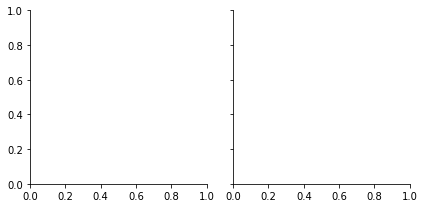

In [4]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")

从那里，我们使用地图对象方法将数据绘制到布局网格中。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


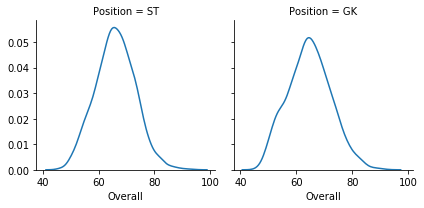

In [5]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

如果这是您第一次看到这样做，那么将方法传递到这样的另一种方法可能需要一些时间来习惯。 但是一旦你习惯了它，`FacetGrid`就很容易使用了。

通过使用一个对象来收集“设计标准”，“seaborn”可以有效地将数据*表示*与数据*值*结合起来，从而使我们无需自己设置图。

但是，我们可能不仅仅关注守门员和前锋。 但是如果我们将所有可能的游戏位置挤压成一排，那么得到的情节就会很小。 `FacetGrid`配备了一个`col_wrap`参数，用于完全处理这种情况。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


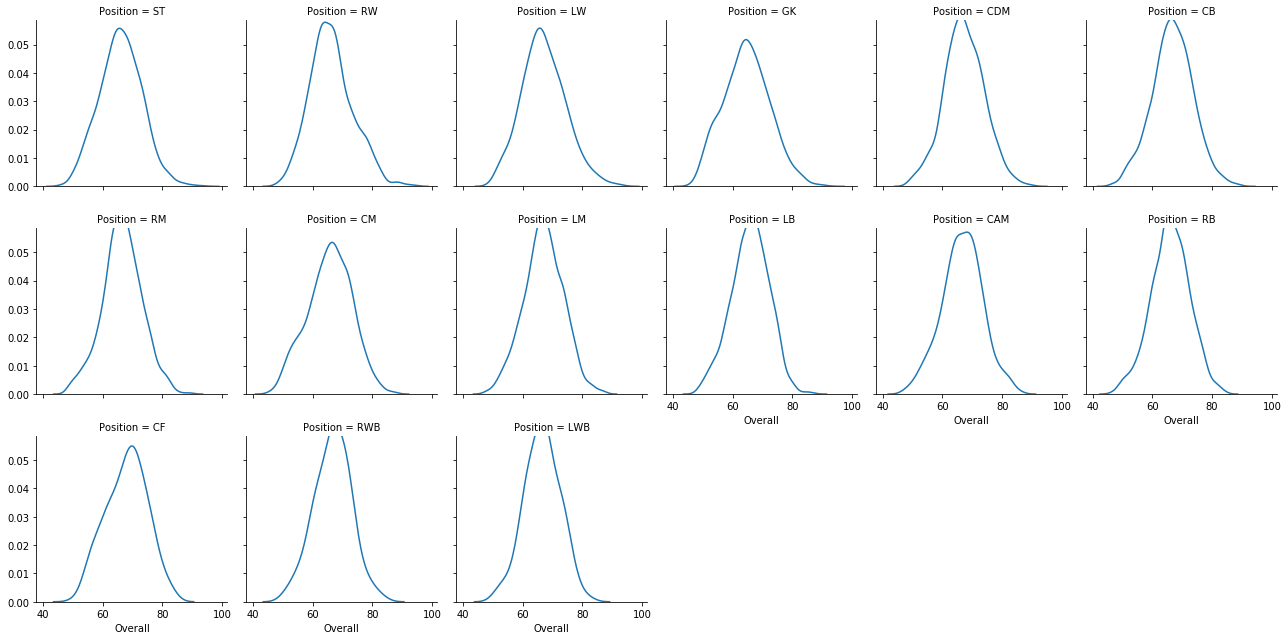

In [6]:
df = footballers

g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

到目前为止，我们一直专门处理一个col（列）数据。 但是，FacetGrid中的“网格”指的是按行和列放置数据的能力。

例如，假设我们有兴趣比较皇家马德里，马德里竞技和巴塞罗那足球俱乐部的对手俱乐部（守门员和前锋特别是保持简洁）的人才分布。

如下图所示，我们可以通过将row = Position和col = Club参数传递到图中来实现。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


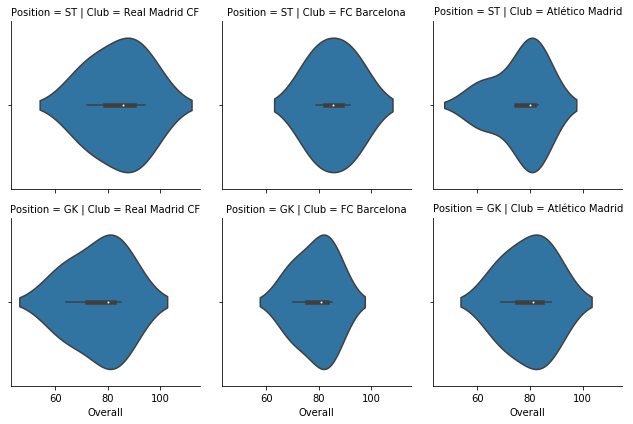

In [7]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall")

`FacetGrid`默认有效地任意命令子图。 要明确指定自己的排序，请将相应的参数传递给`row_order`和`col_order`参数。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


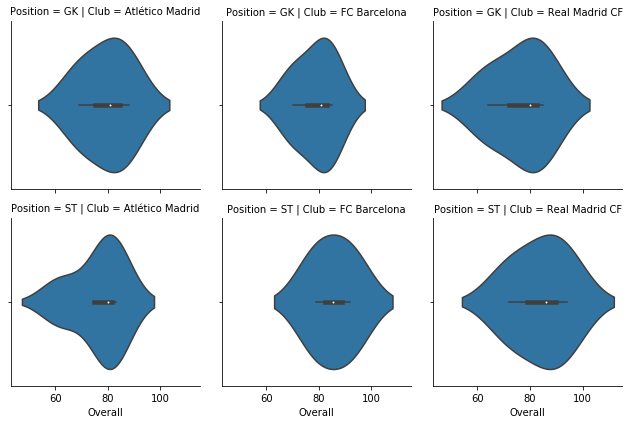

In [8]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club", 
                  row_order=['GK', 'ST'],
                  col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, "Overall")

`FacetGrid`也配备了各种较小的参数，但这些是最重要的参数。

## Why facet?

简而言之，分面是使数据可视化多元化的最简单方法。

分面是多变量的，因为在行中布置一个（分类）变量和列中的另一个（分类）变量之后，我们已经在常规绘图开始之前已经考虑了两个变量。

分面很容易，因为从绘制“kdeplot”过渡到将它们网格化，就像这里一样，非常简单。它不需要学习任何新的可视化技术。限制与您在内部使用的图表相同。

但是，分面确实有一些重要的限制。它只能用于以非常低的计算精度打破奇异或成对分类变量的数据＆mdash;网格中任何超过五个维度，并且图形变得太小（或涉及大量滚动）。此外，它涉及选择（或让Python）订单以进行绘图，但使用名义分类变量，选择是分散任意的。

然而，分面是一个非常有用和适用的工具，可以在您的工具箱中使用。

## Pairplot

既然我们理解了分面，那么值得快速重复一遍“seaborn`` pairplot`功能。

`pairplot`是一个非常有用且广泛使用的`seaborn`方法，用于分割*变量*（与*变量值*相对）。 你以正确的形状传递一个`pandas``DataFrame`，它会返回你变量值的网格化结果：

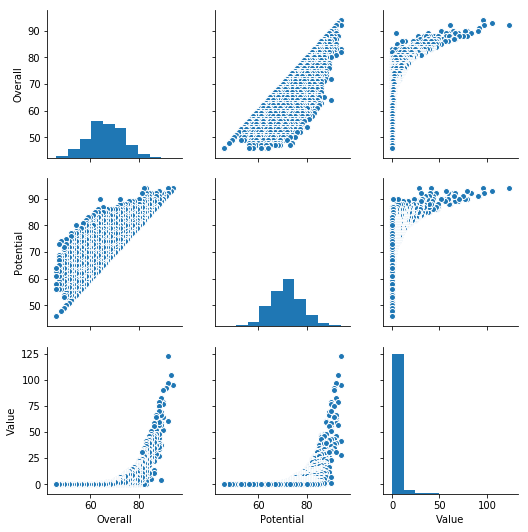

In [9]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

默认情况下，`pairplot`将返回主条目中的散点图和对角线中的直方图。 `pairplot`通常是数据科学家在他们的数据上投入的第一件事，它在这个容量中运行得非常好，即使有时散点和直方图方法在数据类型上也不太合适。

# Examples

和以前的笔记本一样，让我们现在通过回答一些关于我们在本节中使用的图表的问题来测试自己。 得到答案后，单击下面的“输出”按钮以显示正确答案。

1.假设我们用`n`` FacetGrid`创建一个`n`。 有多大可以得到？
2.关于分面的两件事有什么吸引力呢？
3.什么时候`pairplot`最有用？

您应该尝试将网格变量保持在5左右。 否则情节会变得太小。  
它是（1）一种多变量技术，（2）非常容易使用。  
刚开始使用数据集时，对图是最有用的，因为它们有助于对其中的关系进行上下文关联。

接下来，尝试分叉此内核，看看是否可以复制以下图表。

In [11]:
import pandas as pd
import seaborn as sns

pokemon = pd.read_csv("./input/pokemon.csv", index_col=0)
pokemon.head(3)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


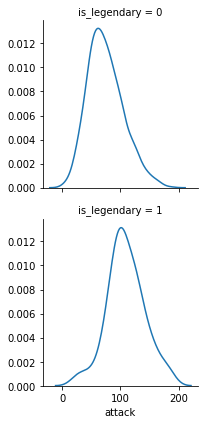

In [12]:
g = sns.FacetGrid(pokemon, row="is_legendary")
g.map(sns.kdeplot, "attack")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


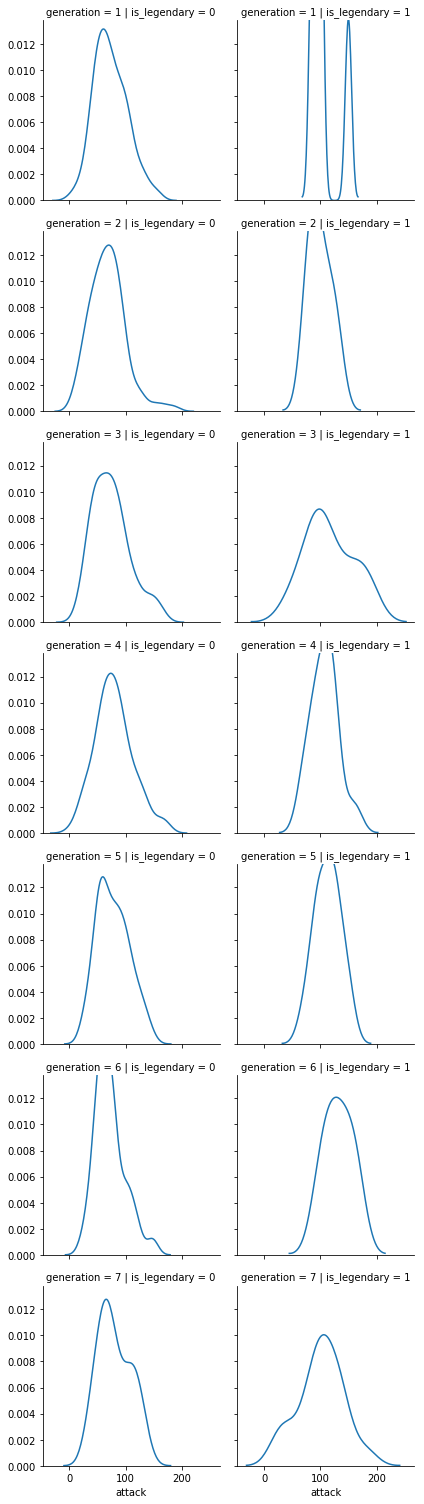

In [13]:
g = sns.FacetGrid(pokemon, col="is_legendary", row="generation")
g.map(sns.kdeplot, "attack")

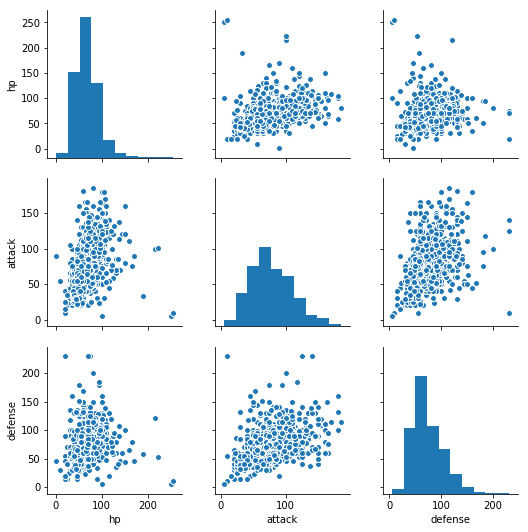

In [14]:
sns.pairplot(pokemon[['hp', 'attack', 'defense']])

## Conclusion

在这个笔记本中，我们探索了“FacetGrid”和“pairplot”，这两个“seaborn”设施用于面对你的数据，并讨论了为什么刻面在各种情况下如此有用。

这种技术是我们第一次进入多变量绘图，我们将在下一节中更深入地探讨另外两种方法。